In [47]:
import sys
sys.path.insert(0, "/Users/aron/polybox/Projects/b_significant")

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

from functions.eval_functions import pval_mac

# Resolution

In [48]:
n_totals = [
    1000,
    2000,
    3000,
    4000,
    5000,
    7000,
    10000,
    15000,
    20000,
    25000,
    30000,
    35000,
    40000,
    50000,
]
delta_bs = np.arange(0, 1.025, 0.025)

all_permutations = [
    i
    for i in it.product(
        n_totals,
        delta_bs,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_n_totals = all_permutations[:, 0].astype(int)
cl_delta_bs = all_permutations[:, 1]

In [49]:
n_totals = [
    1000,
    2000,
    3000,
    4000,
    5000,
    7000,
    10000,
    15000,
    20000,
    25000,
    30000,
    35000,
    40000,
    50000,
]
delta_bs = np.arange(0, 1.025, 0.025)

all_permutations = [
    i
    for i in it.product(
        n_totals,
        delta_bs,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_n_totals = all_permutations[:, 0].astype(int)
cl_delta_bs = all_permutations[:, 1]

def get_string_data(cl_idx):
    save_str = (
            "results/resolution/constant_idx/"
            "acf_mean" + str(cl_idx) + ".csv"
        )
    return save_str


def get_df():
    all_delta_bs = []
    all_n_totals = []
    all_acfs = []
    all_n_series_used = []

    for cl_idx in range(len(cl_n_totals)):
        save_str = get_string_data(cl_idx)
        try :
            acfs = np.genfromtxt('../'+save_str, delimiter=',')
        except :
            acfs = []
        try :
            n_series_used = np.genfromtxt('../'+save_str.replace("acf_mean", "n_used_mean"), delimiter=',')
        except :
            n_series_used = []

        all_delta_bs.extend([cl_delta_bs[cl_idx]]*len(acfs))
        all_n_totals.extend([cl_n_totals[cl_idx]]*len(acfs))
        all_acfs.extend(acfs)
        all_n_series_used.extend(n_series_used)

    print(all_n_totals)
    # make a dataframe
    df = pd.DataFrame({
        "acf": all_acfs,
        "delta b": all_delta_bs,
        "n_total": all_n_totals,
        "n_series_used": all_n_series_used,
    })
    return df

In [50]:
df = get_df()

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 100

In [51]:
df

,acf,delta b,n_total,n_series_used
0,-0.059599,0.0,1000,99.111111
1,0.009205,0.0,1000,99.111111
2,-0.044493,0.0,1000,99.111111
3,-0.011532,0.0,1000,99.111111
4,0.077542,0.0,1000,99.111111
...,...,...,...,...
286995,0.963444,1.0,50000,99.002004
286996,0.953735,1.0,50000,99.002004
286997,0.956988,1.0,50000,99.002004
286998,0.957409,1.0,50000,99.002004


In [52]:
# add a new collum to the dataframe

df["p_val"] = pval_mac(np.array(df["acf"]), np.array(df["n_series_used"]),cutting="constant_idx")

In [53]:
df

,acf,delta b,n_total,n_series_used,p_val
0,-0.059599,0.0,1000,99.111111,0.731965
1,0.009205,0.0,1000,99.111111,0.404723
2,-0.044493,0.0,1000,99.111111,0.666393
3,-0.011532,0.0,1000,99.111111,0.507192
4,0.077542,0.0,1000,99.111111,0.136713
...,...,...,...,...,...
286995,0.963444,1.0,50000,99.002004,0.000000
286996,0.953735,1.0,50000,99.002004,0.000000
286997,0.956988,1.0,50000,99.002004,0.000000
286998,0.957409,1.0,50000,99.002004,0.000000


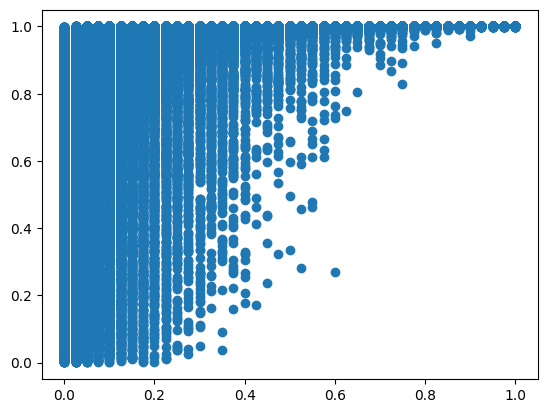

In [54]:
plt.scatter(df['delta b'], 1-df['p_val'])

In [55]:
n_totals


[1000,
 2000,
 3000,
 4000,
 5000,
 7000,
 10000,
 15000,
 20000,
 25000,
 30000,
 35000,
 40000,
 50000]

In [56]:
# make contour plot od p-values

# make a grid of the parameters
delta_bs = np.unique(df['delta b'])
n_totals = np.unique(df['n_total'])

# for each parameter, get the quantiles of the p-values
p_val_grid = np.zeros((len(delta_bs), len(n_totals)))
for ii, delta_b in enumerate(delta_bs):
    for jj, n_total in enumerate(n_totals):
        p_val_grid[ii, jj] = np.quantile(1-df[(df['delta b'] == delta_b) & (df['n_total'] == n_total)]['p_val'], 0.05)


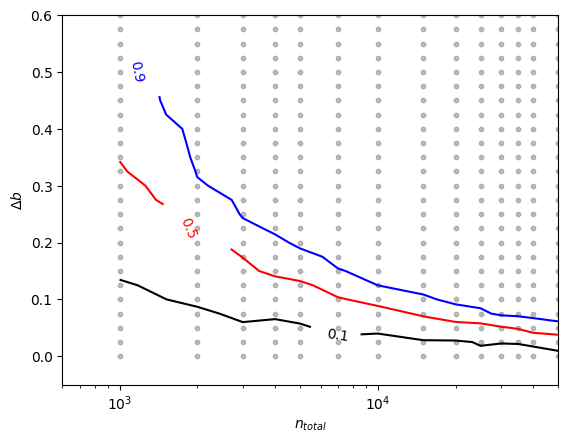

In [57]:
# plot the contour plot
plt.figure()
Contourrange = [0.1,0.5,0.9]
CS = plt.contour(n_totals, delta_bs, p_val_grid, levels=Contourrange, colors=['k','r','b'])
plt.clabel(CS, fontsize=10, inline=1)


# plot grid points
for ii, delta_b in enumerate(delta_bs):
    for jj, n_total in enumerate(n_totals):
        plt.scatter(n_total, delta_b, color='grey', alpha=0.5, s=10)
plt.ylim(-0.05, 0.6)
plt.xlim(600, 50000)

plt.xlabel('$n_{total}$')
plt.ylabel('$\Delta b$')

# log x axis
plt.xscale('log')

# Lengthscale

In [247]:
import sys
sys.path.insert(0, "/Users/aron/polybox/Projects/b_significant")

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd
# import argrelextrema
from scipy.signal import argrelextrema

from functions.eval_functions import mu_sigma_mac

In [193]:
n_total = 40000
cutting = "constant_idx"

delta_bs = np.arange(0.05, 0.3, 0.1)
length_scales = np.arange(100, 2000, 150)
sim_numbers = np.arange(0, 50, 1)

all_permutations = [
    i
    for i in it.product(
        delta_bs,
        sim_numbers,
        length_scales,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_delta_bs = all_permutations[:, 0]
cl_sim_numbers = all_permutations[:, 1].astype(int)
cl_length_scales = all_permutations[:, 2].astype(int)

def get_string_data(cl_idx):
    save_str = (
            "results/length_scale/constant_idx/"
            "acfs" + str(cl_idx) + ".csv"
        )
    return save_str

def get_df():
    all_delta_bs = []
    all_sim_numbers = []
    all_length_scales = []
    all_acfs = []
    all_n_series_used = []
    all_diff_nb = []
    all_diff_one = []
    all_n_bs = []

    for cl_idx in range(len(cl_delta_bs)):
        save_str = get_string_data(cl_idx)
        try :
            acfs = np.genfromtxt('../'+save_str, delimiter=',')
            n_series_used = np.genfromtxt('../'+save_str.replace("acfs", "n_series_used"), delimiter=',')
            diff_nb = np.genfromtxt('../'+save_str.replace("acfs", "diff_nb"), delimiter=',')
            diff_one = np.genfromtxt('../'+save_str.replace("acfs", "diff_one"), delimiter=',')
            n_bs = np.genfromtxt('../'+save_str.replace("acfs", "n_bs"), delimiter=',')
        except :
            acfs = []
            n_series_used = []
            diff_nb = []
            diff_one = []
            n_bs = []

        all_delta_bs.extend([cl_delta_bs[cl_idx]]*len(acfs))
        all_sim_numbers.extend([cl_sim_numbers[cl_idx]]*len(acfs))
        all_length_scales.extend([cl_length_scales[cl_idx]]*len(acfs))
        all_acfs.extend(acfs)
        all_n_series_used.extend(n_series_used)
        all_diff_nb.extend(diff_nb)
        all_diff_one.extend(diff_one)
        all_n_bs.extend(n_bs)

    # make a dataframe
    df = pd.DataFrame({
        "acf": all_acfs,
        "delta b": all_delta_bs,
        "n_b": all_n_bs,
        "length scale": all_length_scales,
        "n_series_used": all_n_series_used,
        "diff_nb": all_diff_nb,
        "diff_one": all_diff_one,
        "simulation no": all_sim_numbers,
    })
    return df

def get_string_data2(cl_idx):
    save_str = (
            "results/length_scale/constant_idx/"
            "df" + str(cl_idx) + ".csv"
        )
    return save_str

def get_df2(cl_idx):
    save_str = get_string_data2(cl_idx)
    print(save_str)
    try :
        df = pd.read_csv('../'+save_str, sep=',')
    except :
        df = []
    return df


In [194]:
df = get_df()

(0.0, 100.0)

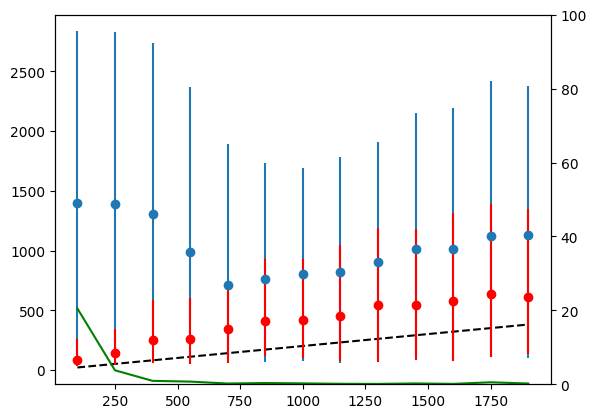

In [221]:
# round delta_b
df['delta b'] = np.round(df['delta b'], 2)

n_max_all = []
n_max_all_std = []
min_diff_all = []
length_all = []
rel_acc_all = []
for length in  np.unique(df['length scale'].values):
    n_max_all_loop = []
    nmin_diff_all_loop = []
    rel_acc_all_loop = []
    for sim_num in sim_numbers:
        idx1 = df['simulation no'].values == sim_num
        idx2 = df['length scale'].values == length
        idx3 = df['delta b'].values == 0.05

        df_loop = df[idx1 & idx2 & idx3]

        n_b = df_loop['n_b'].values
        acf = df_loop['acf'].values
        diff_nb = df_loop['diff_one'].values
        n_series_used = df_loop['n_series_used'].values

        idx_max = np.argmax(acf)
        mu, sigma = mu_sigma_mac(n_series_used[idx_max], cutting)
        if acf[idx_max] > mu + 1.96*sigma:
            # convolve
            diff_nb = np.convolve(diff_nb, np.ones(3)/3, mode='valid')
            nmin_diff = argrelextrema(diff_nb, np.less)[0]
            if len(nmin_diff) > 0:
                idx = nmin_diff[np.argmin(diff_nb[nmin_diff])]
                nmin_diff_all_loop.append(n_b[idx])
                n_max = n_b[idx_max]
                n_max_all_loop.append(n_max)
                # find out how much different the max and min diffs are
                rel_acc_all_loop.append(((diff_nb[idx] - diff_nb[min(idx_max, len(diff_nb)-1)])/diff_nb[idx])**2)
    if len(nmin_diff_all_loop) > 0:
        min_diff_all.append(np.quantile(nmin_diff_all_loop, [0.25,.50,0.75]))    
        n_max_all.append(np.quantile(n_max_all_loop, [0.25,.50,0.75]))
        rel_acc_all_loop = np.array(rel_acc_all_loop)
        rel_acc_all.append(np.sum(rel_acc_all_loop)/len(rel_acc_all_loop))
        length_all.append(length)
n_max_all = np.array(n_max_all)
min_diff_all = np.array(min_diff_all)
plt.errorbar(length_all, min_diff_all[:,1]-10, yerr=[min_diff_all[:,0],min_diff_all[:,2]], fmt='o')
plt.plot([np.min(length_all), np.max(length_all)], np.array([np.min(length_all), np.max
(length_all)])*1/5, 'k--')
plt.errorbar(length_all, n_max_all[:,1], yerr=[n_max_all[:,0],n_max_all[:,2]], fmt='o', color='r')

# twin ax
ax2 = plt.twinx()
ax2.plot(length_all, rel_acc_all, 'g')

# limit
plt.ylim(0, 100)

(0.0, 100.0)

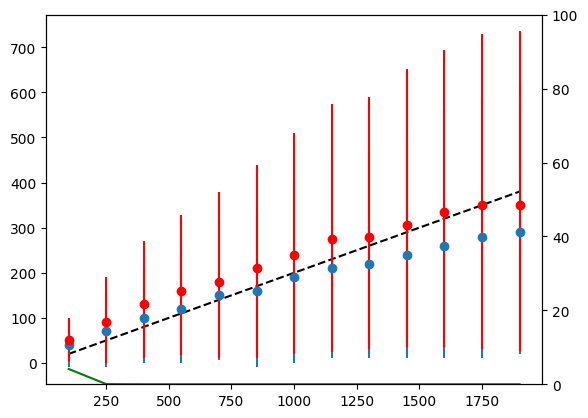

In [240]:
# round delta_b
df['delta b'] = np.round(df['delta b'], 2)

n_max_all = []
n_max_all_std = []
min_diff_all = []
length_all = []
rel_acc_all = []
for length in  np.unique(df['length scale'].values):
    n_max_all_loop = []
    nmin_diff_all_loop = []
    rel_acc_all_loop = []
    for sim_num in sim_numbers:
        idx1 = df['simulation no'].values == sim_num
        idx2 = df['length scale'].values == length
        idx3 = df['delta b'].values == 0.15

        df_loop = df[idx1 & idx2 & idx3]

        n_b = df_loop['n_b'].values
        acf = df_loop['acf'].values
        diff_nb = df_loop['diff_nb'].values
        n_series_used = df_loop['n_series_used'].values

        idx_max = np.argmax(acf)
        mu, sigma = mu_sigma_mac(n_series_used[idx_max], cutting)
        if acf[idx_max] > mu + 1.96*sigma:
            # convolve
            diff_nb = np.convolve(diff_nb, np.ones(3)/3, mode='valid')
            nmin_diff = argrelextrema(diff_nb, np.less)[0]
            if len(nmin_diff) > 0:
                idx = nmin_diff[np.argmin(diff_nb[nmin_diff])]
                nmin_diff_all_loop.append(n_b[idx])
                n_max = n_b[idx_max]
                n_max_all_loop.append(n_max)
                # find out how much different the max and min diffs are
                rel_acc_all_loop.append(((diff_nb[idx] - diff_nb[min(idx_max, len(diff_nb)-1)])/diff_nb[idx])**2)
    if len(nmin_diff_all_loop) > 0:
        min_diff_all.append(np.quantile(nmin_diff_all_loop, [0.25,.50,0.75]))    
        n_max_all.append(np.quantile(n_max_all_loop, [0.25,.50,0.75]))
        rel_acc_all_loop = np.array(rel_acc_all_loop)
        rel_acc_all.append(np.sum(rel_acc_all_loop)/len(rel_acc_all_loop))
        length_all.append(length)
n_max_all = np.array(n_max_all)
min_diff_all = np.array(min_diff_all)
plt.errorbar(length_all, min_diff_all[:,1]-10, yerr=[min_diff_all[:,0],min_diff_all[:,2]], fmt='o')
plt.plot([np.min(length_all), np.max(length_all)], np.array([np.min(length_all), np.max
(length_all)])*1/5, 'k--')
plt.errorbar(length_all, n_max_all[:,1], yerr=[n_max_all[:,0],n_max_all[:,2]], fmt='o', color='r')

# twin ax
ax2 = plt.twinx()
ax2.plot(length_all, rel_acc_all, 'g')

# limit
plt.ylim(0, 100)

(0.0, 100.0)

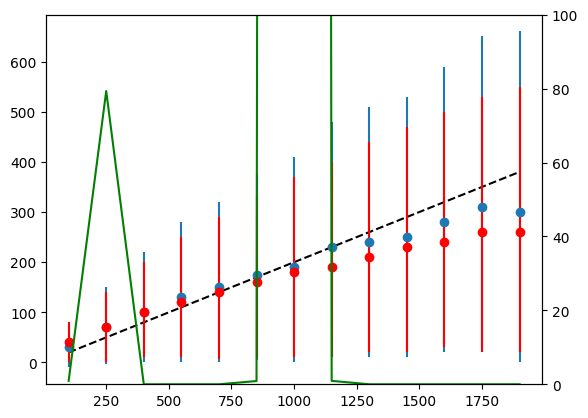

In [225]:
# round delta_b
df['delta b'] = np.round(df['delta b'], 2)

n_max_all = []
n_max_all_std = []
min_diff_all = []
length_all = []
rel_acc_all = []
for length in  np.unique(df['length scale'].values):
    n_max_all_loop = []
    nmin_diff_all_loop = []
    rel_acc_all_loop = []
    for sim_num in sim_numbers:
        idx1 = df['simulation no'].values == sim_num
        idx2 = df['length scale'].values == length
        idx3 = df['delta b'].values == 0.25

        df_loop = df[idx1 & idx2 & idx3]

        n_b = df_loop['n_b'].values
        acf = df_loop['acf'].values
        diff_nb = df_loop['diff_one'].values
        n_series_used = df_loop['n_series_used'].values

        idx_max = np.argmax(acf)
        mu, sigma = mu_sigma_mac(n_series_used[idx_max], cutting)
        if acf[idx_max] > mu + 1.96*sigma:
            # convolve
            diff_nb = np.convolve(diff_nb, np.ones(3)/3, mode='valid')
            nmin_diff = argrelextrema(diff_nb, np.less)[0]
            if len(nmin_diff) > 0:
                idx = nmin_diff[np.argmin(diff_nb[nmin_diff])]
                nmin_diff_all_loop.append(n_b[idx])
                n_max = n_b[idx_max]
                n_max_all_loop.append(n_max)
                # find out how much different the max and min diffs are
                rel_acc_all_loop.append(((diff_nb[idx] - diff_nb[min(idx_max, len(diff_nb)-1)])/diff_nb[idx])**2)
    if len(nmin_diff_all_loop) > 0:
        min_diff_all.append(np.quantile(nmin_diff_all_loop, [0.25,.50,0.75]))    
        n_max_all.append(np.quantile(n_max_all_loop, [0.25,.50,0.75]))
        rel_acc_all_loop = np.array(rel_acc_all_loop)
        rel_acc_all.append(np.sum(rel_acc_all_loop)/len(rel_acc_all_loop))
        length_all.append(length)
n_max_all = np.array(n_max_all)
min_diff_all = np.array(min_diff_all)
plt.errorbar(length_all, min_diff_all[:,1]-10, yerr=[min_diff_all[:,0],min_diff_all[:,2]], fmt='o')
plt.plot([np.min(length_all), np.max(length_all)], np.array([np.min(length_all), np.max
(length_all)])*1/5, 'k--')
plt.errorbar(length_all, n_max_all[:,1], yerr=[n_max_all[:,0],n_max_all[:,2]], fmt='o', color='r')

# twin ax
ax2 = plt.twinx()
ax2.plot(length_all, rel_acc_all, 'g')

# limit
plt.ylim(0, 100)

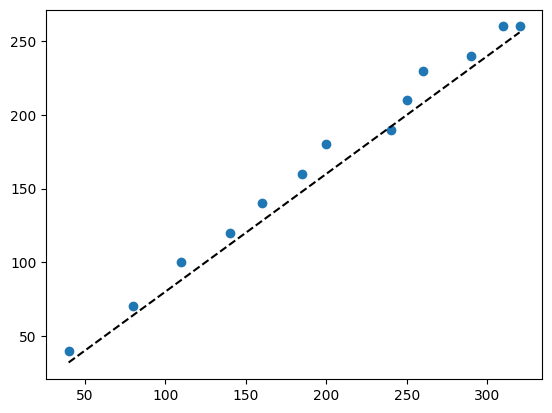

In [246]:
# round delta_b
df['delta b'] = np.round(df['delta b'], 2)

n_max_all = []
n_max_all_std = []
min_diff_all = []
length_all = []
rel_acc_all = []
for length in  np.unique(df['length scale'].values):
    n_max_all_loop = []
    nmin_diff_all_loop = []
    rel_acc_all_loop = []
    for sim_num in sim_numbers:
        idx1 = df['simulation no'].values == sim_num
        idx2 = df['length scale'].values == length
        idx3 = df['delta b'].values == 0.25

        df_loop = df[idx1 & idx2 & idx3]

        n_b = df_loop['n_b'].values
        acf = df_loop['acf'].values
        diff_nb = df_loop['diff_one'].values
        n_series_used = df_loop['n_series_used'].values

        idx_max = np.argmax(acf)
        mu, sigma = mu_sigma_mac(n_series_used[idx_max], cutting)
        if acf[idx_max] > mu + 1.96*sigma:
            # convolve
            diff_nb = np.convolve(diff_nb, np.ones(3)/3, mode='valid')
            nmin_diff = argrelextrema(diff_nb, np.less)[0]
            if len(nmin_diff) > 0:
                idx = nmin_diff[np.argmin(diff_nb[nmin_diff])]
                nmin_diff_all_loop.append(n_b[idx])
                n_max = n_b[idx_max]
                n_max_all_loop.append(n_max)
                # find out how much different the max and min diffs are
                rel_acc_all_loop.append(((diff_nb[idx] - diff_nb[min(idx_max, len(diff_nb)-1)])/diff_nb[idx])**2)
    if len(nmin_diff_all_loop) > 0:
        min_diff_all.append(np.quantile(nmin_diff_all_loop, [0.25,.50,0.75]))    
        n_max_all.append(np.quantile(n_max_all_loop, [0.25,.50,0.75]))
        rel_acc_all_loop = np.array(rel_acc_all_loop)
        rel_acc_all.append(np.sum(rel_acc_all_loop)/len(rel_acc_all_loop))
        length_all.append(length)
n_max_all = np.array(n_max_all)
min_diff_all = np.array(min_diff_all)

plt.plot(min_diff_all[:,1], n_max_all[:,1], 'o')
range = np.array([min(min_diff_all[:,1]), max(min_diff_all[:,1])])
plt.plot(range, range*0.8, 'k--')

In [229]:
n_max_all

array([[ 40. ,  40. ,  40. ],
       [ 70. ,  70. ,  70. ],
       [ 90. , 100. , 100. ],
       [110. , 120. , 130. ],
       [132.5, 140. , 150. ],
       [150. , 160. , 170. ],
       [170. , 180. , 190. ],
       [180. , 190. , 210. ],
       [190. , 210. , 230. ],
       [210. , 230. , 240. ],
       [210. , 240. , 260. ],
       [240. , 260. , 270. ],
       [240. , 260. , 290. ]])

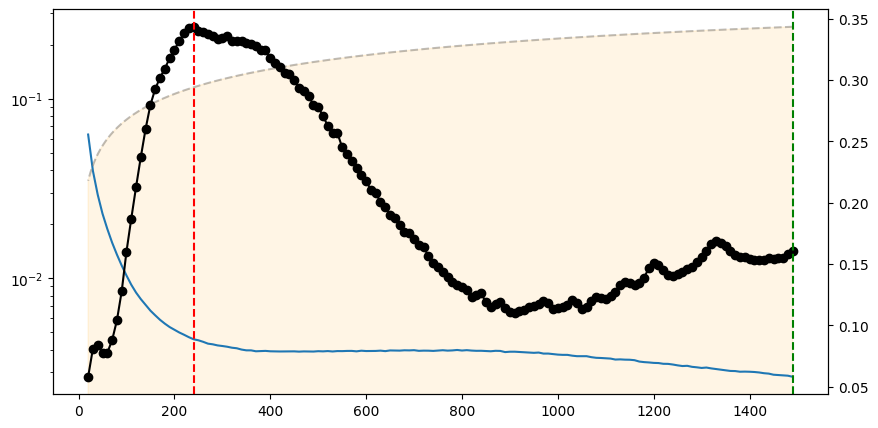

In [190]:
# round delta_b
df['delta b'] = np.round(df['delta b'], 2)

ax1 = plt.subplots(figsize=(10, 5))[1]
plt.yscale('log')
ax2 = plt.gca().twinx()

sim_num =10

idx1 = df['simulation no'].values == sim_num
idx2 = df['length scale'].values == 550
idx3 = df['delta b'].values == 0.05

df_loop = df[idx1 & idx2 & idx3]

n_b = df_loop['n_b'].values
acf = df_loop['acf'].values
diff_nb = df_loop['diff_nb'].values

ax1.plot(n_b, diff_nb)

# twin ax
ax2.plot(n_b, acf, color='black', marker='o')
n_max = n_b[np.argmax(acf)]
ax2.axvline(n_max, color='red', linestyle='--')
nmin_diff = n_b[np.argmin(diff_nb)]
ax2.axvline(nmin_diff, color='green', linestyle='--')

# Plot 0.05 threshold
x = np.arange(n_total/max(n_b), n_total/min(n_b) + 1, 1)
mu, sigma = mu_sigma_mac(x, cutting)
ax1.plot(
    n_total / x,
    1.96 * sigma - 1 / x,
    color="grey",
    linestyle="--",
    alpha=0.5,
)
ax1.plot(
    n_total / x,
    -1.96 * sigma - 1 / x,
    color="grey",
    linestyle="--",
    alpha=0.5,
)
ax1.plot(n_total / x, mu, color="grey", linestyle="-")
ax1.fill_between(
    n_total / x,
    1.96 * sigma - 1 / x,
    -1.96 * sigma - 1 / x,
    color="orange",
    alpha=0.1,
    label="95% confidence interval",
)

In [250]:
df = get_df2(0)

results/length_scale/constant_idx/df0.csv


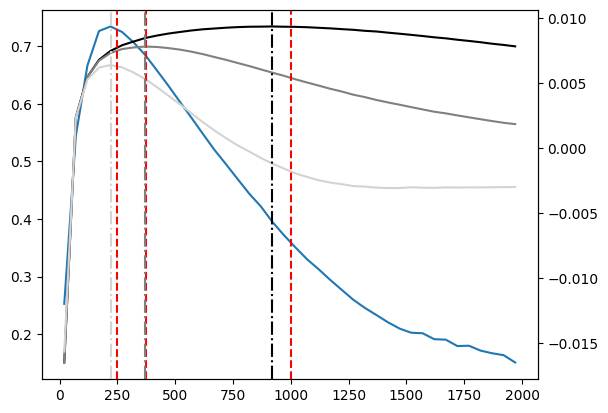

In [268]:
plt.plot(df['n_b'], df['acf'])
# twin ax
ax2 = plt.gca().twinx()
ax2.plot(df['n_b'], df['ig_here'], color='black')
ax2.plot(df['n_b'], df['ig_next1'], color='grey')
ax2.plot(df['n_b'], df['ig_next'], color='lightgrey')

plt.axvline(1000, color='red', linestyle='--')
plt.axvline(250, color='red', linestyle='--')
plt.axvline(250*1.5, color='red', linestyle='--')
plt.axvline(df['n_b'][np.argmax(df['acf'])], color='red', linestyle='--')

plt.axvline(df['n_b'][np.argmax(df['ig_here'])], color='black', linestyle='-.')
plt.axvline(df['n_b'][np.argmax(df['ig_next1'])], color='grey', linestyle='-.')
plt.axvline(df['n_b'][np.argmax(df['ig_next'])], color='lightgrey', linestyle='-.')

In [251]:
df

,acf,sim_number,n_b,ig_here,ig_next,ig_next1
0,0.252791,0,20,-0.016465,-0.015628,-0.016451
1,0.544295,0,70,0.002366,0.002325,0.002393
2,0.666315,0,120,0.005478,0.005263,0.005478
3,0.726300,0,170,0.006792,0.006204,0.006728
4,0.734258,0,220,0.007478,0.006390,0.007318
5,0.724734,0,270,0.007915,0.006218,0.007620
6,0.706510,0,320,0.008201,0.005819,0.007744
7,0.684818,0,370,0.008471,0.005318,0.007813
8,0.658378,0,420,0.008656,0.004706,0.007783
9,0.631542,0,470,0.008811,0.004043,0.007696
